In [11]:
import numpy as np

import matplotlib.pyplot as plt
import math

In [12]:
def foo(x):
    return 100 * ((x[1] - (x[0] ** 2)) ** 2) + (1 - x[0]) ** 2

def fooGradient(x):
    return np.array([200 * (x[0] ** 2 - x[1]) * 2 * x[0] + 2 * x[0] - 2, 200 * (x[1] - x[0] ** 2)])

def fooHessian(x):
    return np.array([[400 *(3 * (x[0] ** 2) - x[1]) + 2, -400 * x[0]], [-400 * x[0], 200]])

def armijo(x, alpha, direction, c, gradX):
    f1 = foo(x)
    f2 = foo(x + alpha * direction)
    imp = c * alpha * gradX.T @ direction
    # print("x=", x, "f1=", f1, "f2=", f2, "imp=", imp, "alpha=", alpha, "direction=", direction)
    return f2 <= f1 + imp

def happy(gradSquareX):
    return gradSquareX < 1e-6

#### DFP

In [13]:
def DFPHessian(h, p, q):
    p = p.reshape(2, 1)
    q = q.reshape(2, 1)
    print("DFP")
    # print("DFPHessian", h @ q, h @ q @ q.T)
    return np.array(h + ((p @ p.T) / (p.T @ q)) - ((h @ q) @ q.T @ h) / ((q.T @ h) @ q))

def DFP():
    c = 0.7
    rho = 0.5
    alpha_0 = 1
    h = np.array([[1, 0], [0, 1]])
    x = np.array([0, 0])
    k = 1
    fooValues = []
    gradValues = []
    while True:
        fooValue = foo(x)
        # print(f"\rk={k}, foo={fooValue}, x={x}", end="")
        alpha = alpha_0
        fooValues.append(fooValue)
        gradX = fooGradient(x)
        gradSquareX = gradX.T @ gradX
        gradValues.append(gradSquareX)
        if happy(gradSquareX):
            break

        direction = -h @ gradX
        while not armijo(x, alpha, direction, c, gradX):
            alpha = alpha * rho
        # next step
        p = alpha * direction
        x = x + alpha * direction
        q = fooGradient(x) - gradX
        k = k + 1
        h = DFPHessian(h, p, q)
        print(k, h)
        # print(k, x, p, q, h, fooHessian(x), alpha, gradX, direction)

    print()
    print("k=", k)
    return gradValues
temp = DFP()

DFP
2 [[1.02300669 0.29759221]
 [0.29759221 0.09820543]]
DFP
3 [[0.11062542 0.0469705 ]
 [0.0469705  0.02946944]]
DFP
4 [[0.16371672 0.08078305]
 [0.08078305 0.04651151]]
DFP
5 [[0.13219002 0.08448   ]
 [0.08448    0.05751506]]
DFP
6 [[0.10639966 0.07986538]
 [0.07986538 0.06254406]]
DFP
7 [[0.09988074 0.08874171]
 [0.08874171 0.08128418]]
DFP
8 [[0.10064923 0.09942992]
 [0.09942992 0.10089997]]
DFP
9 [[0.10578287 0.11426871]
 [0.11426871 0.12663134]]
DFP
10 [[0.1168456  0.13565009]
 [0.13565009 0.16154684]]
DFP
11 [[0.13472575 0.17194786]
 [0.17194786 0.22432262]]
DFP
12 [[0.17403002 0.24058961]
 [0.24058961 0.34039804]]
DFP
13 [[0.25611518 0.3757397 ]
 [0.3757397  0.56255301]]
DFP
14 [[0.24972081 0.40803168]
 [0.40803168 0.67827814]]
DFP
15 [[0.39312695 0.65138107]
 [0.65138107 1.08720695]]
DFP
16 [[0.3050081  0.53431551]
 [0.53431551 0.94012476]]
DFP
17 [[0.28604371 0.51844108]
 [0.51844108 0.94339901]]
DFP
18 [[0.28765755 0.53677538]
 [0.53677538 1.00611998]]
DFP
19 [[0.32571391 0.

#### BFGS

In [14]:
def BFGSHessian(h, p, q):
    num_rows, nums_cols = h.shape
    i = np.identity(num_rows)
    p = p.reshape(2, 1)
    q = q.reshape(2, 1)
    print("BFGS")
    # print("DFPHessian", h @ q, h @ q @ q.T)
    return ((i - ((p @ q.T) / (p.T @ q))) @ h) @ (i - ((q @ p.T) / (p.T @ q))) + ((p @ p.T) / (p.T @ q))
    # return np.array(h - ((h @ q @ q.T @ h) / (q.T @ h @ q)) + ((p @ p.T) / (p.T @ q)))

def BFGS():
    c = 0.7
    rho = 0.5
    alpha_0 = 1
    h = np.array([[1, 0], [0, 1]])
    x = np.array([0, 0])
    k = 1
    fooValues = []
    gradValues = []
    while True:
        fooValue = foo(x)
        # print(f"\rk={k}, foo={fooValue}, x={x}", end="")
        alpha = alpha_0
        fooValues.append(fooValue)
        gradX = fooGradient(x)
        gradSquareX = gradX.T @ gradX
        gradValues.append(gradSquareX)
        if happy(gradSquareX):
            break

        direction = -h @ gradX
        while not armijo(x, alpha, direction, c, gradX):
            alpha = alpha * rho
        # next step
        p = alpha * direction
        x = x + alpha * direction
        q = fooGradient(x) - gradX
        k = k + 1
        h = BFGSHessian(h, p, q)
        print(k, h)

    print()
    print("k=", k)
    return gradValues
temp = BFGS()

BFGS
2 [[9.30394858 3.03030303]
 [3.03030303 1.        ]]
BFGS
3 [[0.1225918  0.03837355]
 [0.03837355 0.02505766]]
BFGS
4 [[0.19493493 0.0703111 ]
 [0.0703111  0.03828222]]
BFGS
5 [[0.18969048 0.12868249]
 [0.12868249 0.09460487]]
BFGS
6 [[0.12729166 0.08966236]
 [0.08966236 0.07152031]]
BFGS
7 [[0.1506374  0.12093399]
 [0.12093399 0.10882819]]
BFGS
8 [[0.1875497  0.1669158 ]
 [0.1669158  0.16423528]]
BFGS
9 [[0.1797935  0.19904439]
 [0.19904439 0.24472075]]
BFGS
10 [[0.48884222 0.56800441]
 [0.56800441 0.66582647]]
BFGS
11 [[0.24441243 0.30674195]
 [0.30674195 0.38885691]]
BFGS
12 [[0.18709577 0.25121624]
 [0.25121624 0.34097918]]
BFGS
13 [[0.16918928 0.24380335]
 [0.24380335 0.35575668]]
BFGS
14 [[0.17693254 0.26678097]
 [0.26678097 0.40898876]]
BFGS
15 [[0.25909356 0.40043706]
 [0.40043706 0.62600304]]
BFGS
16 [[0.23605898 0.39487834]
 [0.39487834 0.67010845]]
BFGS
17 [[0.38647543 0.65226167]
 [0.65226167 1.10760973]]
BFGS
18 [[0.33622884 0.60218633]
 [0.60218633 1.08425756]]
BFGS


#### CG Fletcher-Reeves

In [15]:
def CGFletcher_Reeves(next_gradX, gradX):
    return (next_gradX.T @ next_gradX) / (gradX.T @ gradX)

def CG_FR():
    c = 0.7
    rho = 0.5
    alpha_0 = 1
    h = np.array([[1, 0], [0, 1]])
    x = np.array([0, 0])
    k = 1
    fooValues = []
    gradValues = []
    direction = -fooGradient(x)
    while True:
        fooValue = foo(x)
        # print(f"\rk={k}, foo={fooValue}, x={x}", end="")
        alpha = alpha_0
        fooValues.append(fooValue)
        gradX = fooGradient(x)
        gradSquareX = gradX.T @ gradX
        gradValues.append(gradSquareX)
        if happy(gradSquareX):
            break
        while not armijo(x, alpha, direction, c, gradX):
            alpha = alpha * rho
        # next step
        x = x + alpha * direction
        beta = CGFletcher_Reeves(fooGradient(x), gradX)
        direction = -fooGradient(x) + beta * direction
        k = k + 1

    print()
    print("k=", k)
    return gradValues
temp = CG_FR()


k= 76


#### CG Polak-Ribiere

In [16]:
def CGPolak_Ribiere(next_gradX, gradX):
    return (next_gradX.T @ (next_gradX - gradX)) / (gradX.T @ gradX)

def CG_PR():
    c = 0.7
    rho = 0.5
    alpha_0 = 1
    h = np.array([[1, 0], [0, 1]])
    x = np.array([0, 0])
    k = 1
    fooValues = []
    gradValues = []
    direction = -fooGradient(x)
    while True:
        fooValue = foo(x)
        # print(f"\rk={k}, foo={fooValue}, x={x}", end="")
        alpha = alpha_0
        fooValues.append(fooValue)
        gradX = fooGradient(x)
        gradSquareX = gradX.T @ gradX
        gradValues.append(gradSquareX)
        if happy(gradSquareX):
            break
        while not armijo(x, alpha, direction, c, gradX):
            alpha = alpha * rho
        # next step
        x = x + alpha * direction
        beta = CGPolak_Ribiere(fooGradient(x), gradX)
        direction = -fooGradient(x) + beta * direction
        k = k + 1

    print()
    print("k=", k)
    return gradValues
temp = CG_PR()


k= 92


DFP
2 [[1.02300669 0.29759221]
 [0.29759221 0.09820543]]
DFP
3 [[0.11062542 0.0469705 ]
 [0.0469705  0.02946944]]
DFP
4 [[0.16371672 0.08078305]
 [0.08078305 0.04651151]]
DFP
5 [[0.13219002 0.08448   ]
 [0.08448    0.05751506]]
DFP
6 [[0.10639966 0.07986538]
 [0.07986538 0.06254406]]
DFP
7 [[0.09988074 0.08874171]
 [0.08874171 0.08128418]]
DFP
8 [[0.10064923 0.09942992]
 [0.09942992 0.10089997]]
DFP
9 [[0.10578287 0.11426871]
 [0.11426871 0.12663134]]
DFP
10 [[0.1168456  0.13565009]
 [0.13565009 0.16154684]]
DFP
11 [[0.13472575 0.17194786]
 [0.17194786 0.22432262]]
DFP
12 [[0.17403002 0.24058961]
 [0.24058961 0.34039804]]
DFP
13 [[0.25611518 0.3757397 ]
 [0.3757397  0.56255301]]
DFP
14 [[0.24972081 0.40803168]
 [0.40803168 0.67827814]]
DFP
15 [[0.39312695 0.65138107]
 [0.65138107 1.08720695]]
DFP
16 [[0.3050081  0.53431551]
 [0.53431551 0.94012476]]
DFP
17 [[0.28604371 0.51844108]
 [0.51844108 0.94339901]]
DFP
18 [[0.28765755 0.53677538]
 [0.53677538 1.00611998]]
DFP
19 [[0.32571391 0.

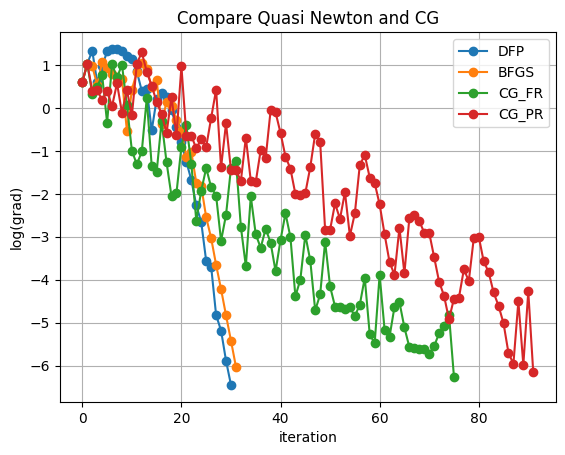

In [17]:
xStart = 0
DFPy= list(map(math.log10, DFP()))
DFPx = [i for i in range(len(DFPy))]

BFGSy = list(map(math.log10, BFGS()))
BFGSx = [i for i in range(len(BFGSy))]

CG_FRy = list(map(math.log10, CG_FR()))
CG_FRx = [i for i in range(len(CG_FRy))]

CG_PRy = list(map(math.log10, CG_PR()))
CG_PRx = [i for i in range(len(CG_PRy))]

# Create a plot
plt.plot(DFPx[xStart:], DFPy[xStart:], marker='o', linestyle='-', label='DFP')
plt.plot(BFGSx[xStart:], BFGSy[xStart:], marker='o', linestyle='-', label='BFGS')
plt.plot(CG_FRx[xStart:], CG_FRy[xStart:], marker='o', linestyle='-', label='CG_FR')
plt.plot(CG_PRx[xStart:], CG_PRy[xStart:], marker='o', linestyle='-', label='CG_PR')

# Add title and labels
plt.title('Compare Quasi Newton and CG')
plt.xlabel('iteration')
plt.ylabel('log(grad)')
plt.legend()

# Show the plot
plt.grid(True)  # Show grid
plt.show()